In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

Importing The Dataset (Seattle Weather Dataset from Kaggle)

In [491]:
df = pd.read_csv("seattle-weather.csv")

Exploring The Dataset and Extracting Insights

In [492]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [493]:
df.shape

(1461, 6)

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


No Null Values so Imputation not really needed

In [495]:
import seaborn as sns

In [496]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df["weather_encoded"] = enc.fit_transform(df['weather'])

weather_names = dict(zip(enc.classes_, enc.transform(enc.classes_)))

In [497]:
df

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


/var/folders/3l/sv8msxn916vcnqfh718hz_m40000gn/T/ipykernel_12301/1680686491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='weather',palette='hls')


<Axes: xlabel='weather', ylabel='count'>

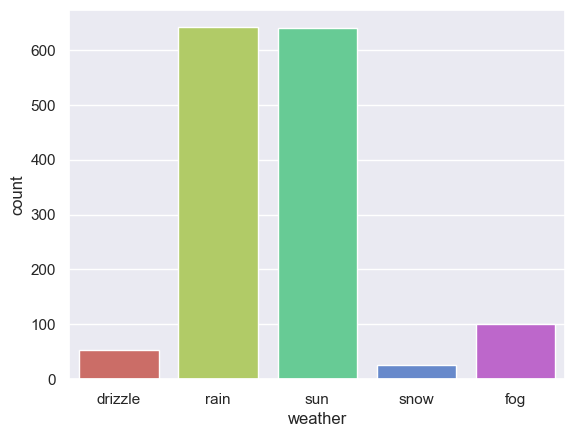

In [498]:
sns.countplot(data= df, x='weather',palette='hls')

/var/folders/3l/sv8msxn916vcnqfh718hz_m40000gn/T/ipykernel_12301/3899508332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='weather_encoded',palette='hls')


<Axes: xlabel='weather_encoded', ylabel='count'>

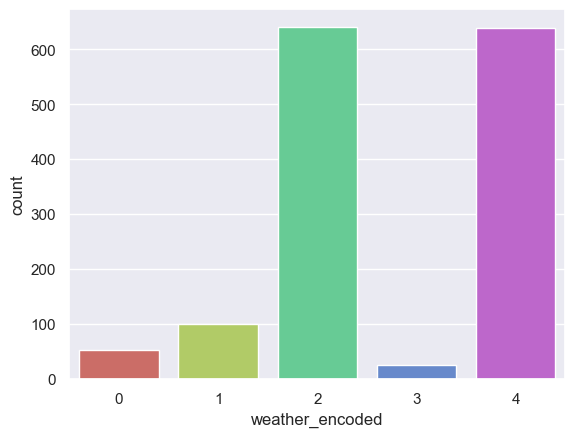

In [499]:
sns.countplot(data= df, x='weather_encoded',palette='hls')

So

Fog is 1
Rain is 2
Snow is 3
Sun is 4

In [500]:
weather_counts = df['weather'].value_counts()

for weather, count in weather_counts.items():
    percent = count/len(df) * 100
    print(f"Percent of {weather}: {percent:.2f}%")

Percent of rain: 43.87%
Percent of sun: 43.81%
Percent of fog: 6.91%
Percent of drizzle: 3.63%
Percent of snow: 1.78%


In [501]:
df[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Visualising The Distribution of the Values in the respective Columns

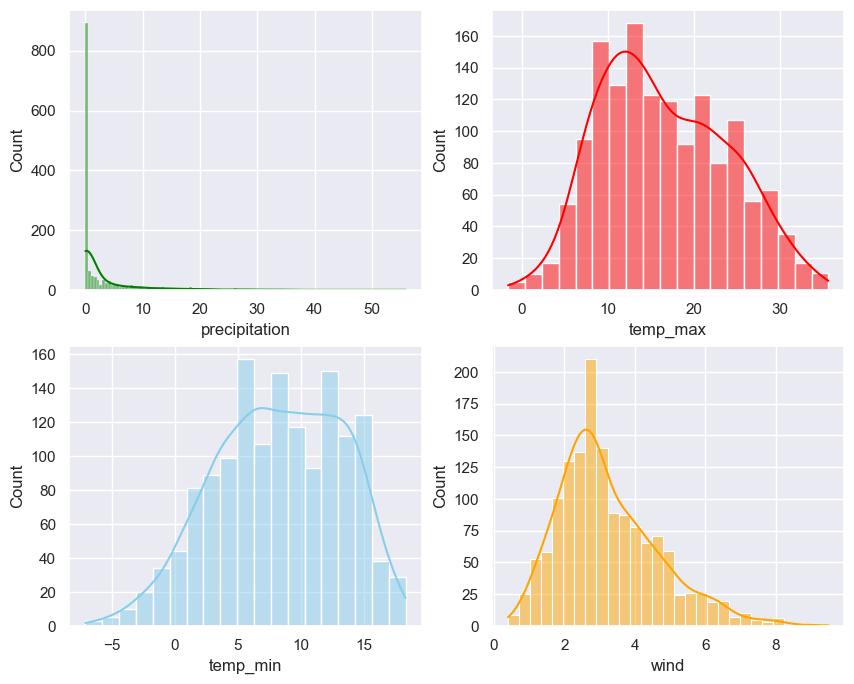

In [502]:
sns.set(style="darkgrid")

variables = ['precipitation','temp_max','temp_min','wind']
colors = ['green','red','skyblue','orange']

fig, axis = plt.subplots(2, 2, figsize= (10,8))

for i,var in enumerate(variables):
    sns.histplot(data = df, x = var, kde = True, ax = axis[i//2,i%2],color = colors[i])

Inference : No data is 'Normal' and precipitation scale is really off and thus can be a problem

# Outlier Analysis Using BoxPlots

/var/folders/3l/sv8msxn916vcnqfh718hz_m40000gn/T/ipykernel_12301/110012831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='precipitation',y='weather',data=df,palette='winter',ax=ax)


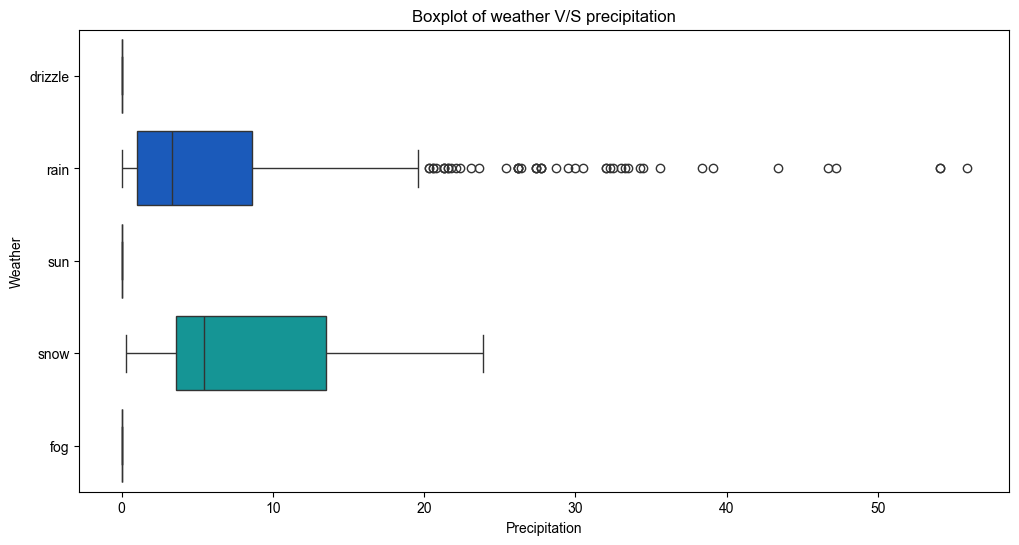

In [503]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize = (12,6))
    sns.boxplot(x='precipitation',y='weather',data=df,palette='winter',ax=ax)
    ax.set(xlabel='Precipitation',ylabel='Weather',title= 'Boxplot of weather V/S precipitation')


From the boxplot, rain shows a high variability in precipitation with significant outliers, whereas snow has a more consistent spread. Fog, sun, and drizzle show near-zero precipitation, confirming expected weather patterns

/var/folders/3l/sv8msxn916vcnqfh718hz_m40000gn/T/ipykernel_12301/2080180616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=df, palette="spring", ax=ax)


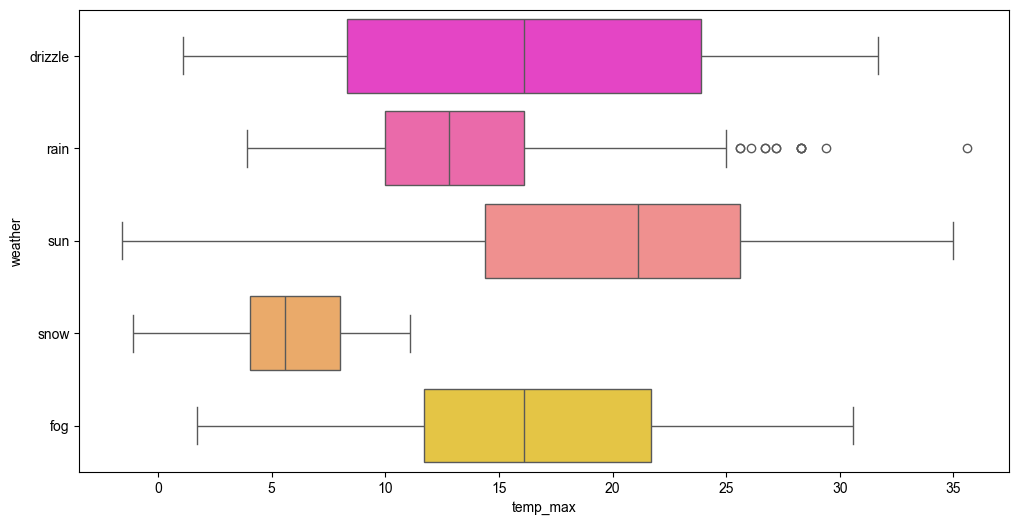

In [504]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=df, palette="spring", ax=ax)

Again, rain coming in with so many outliers. Snow is little positively skewed while sun is a  little extended but negatively skewed

/var/folders/3l/sv8msxn916vcnqfh718hz_m40000gn/T/ipykernel_12301/1163379780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=df, palette="summer", ax=ax)


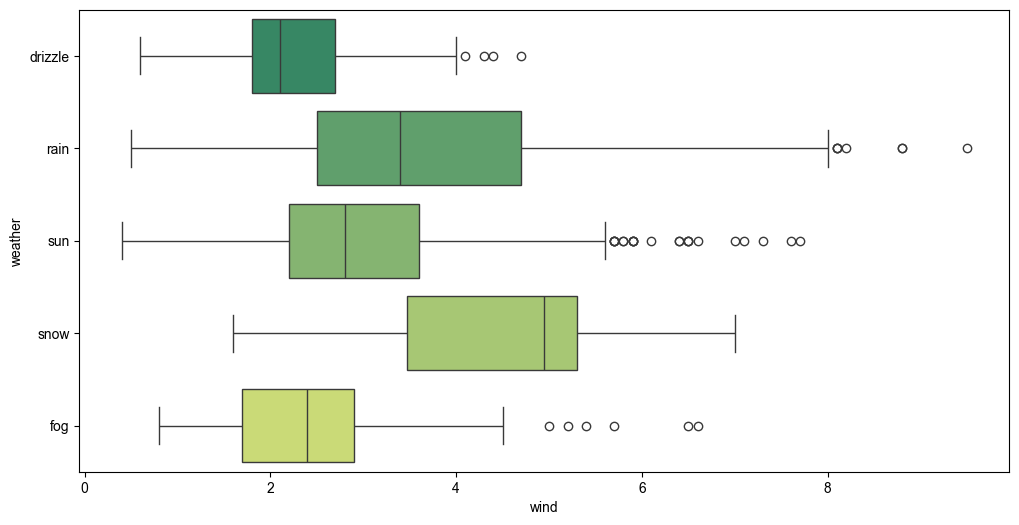

In [505]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=df, palette="summer", ax=ax)

Here we have a lot of outliers and also the boxplots are heavily negatively skewed

/var/folders/3l/sv8msxn916vcnqfh718hz_m40000gn/T/ipykernel_12301/1193030453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=df, palette="autumn", ax=ax)


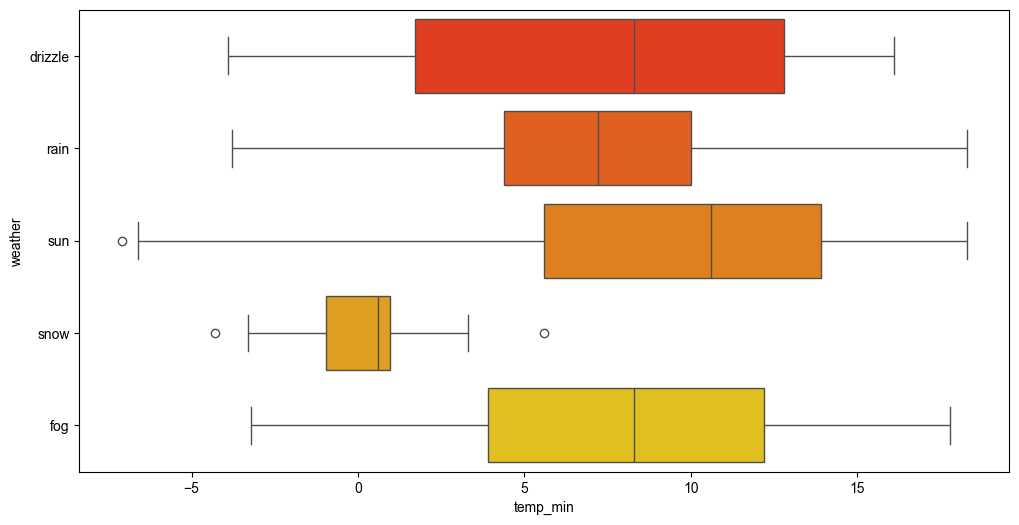

In [506]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=df, palette="autumn", ax=ax)

Similar as prev plots but most are negatively skewed

In [507]:
df_corr = df[['precipitation','temp_max','wind','weather_encoded']]

In [508]:
df_corr

,precipitation,temp_max,wind,weather_encoded
0,0.0,12.8,4.7,0
1,10.9,10.6,4.5,2
2,0.8,11.7,2.3,2
3,20.3,12.2,4.7,2
4,1.3,8.9,6.1,2
...,...,...,...,...
1456,8.6,4.4,2.9,2
1457,1.5,5.0,1.3,2
1458,0.0,7.2,2.6,1
1459,0.0,5.6,3.4,4


Text(0.5, 1.0, 'Correlation Heatmap')

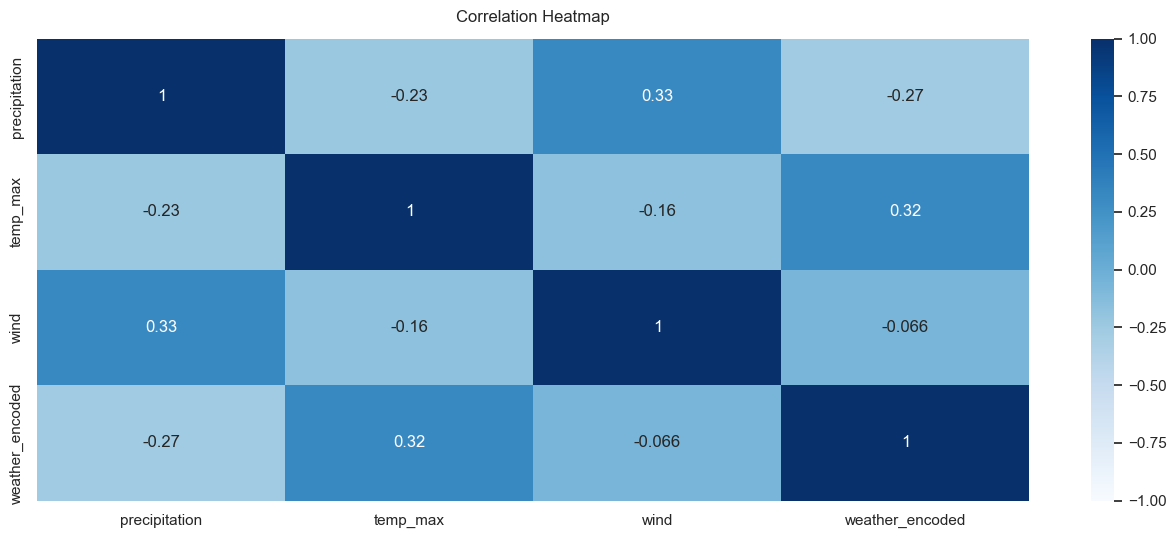

In [509]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True,cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### Wind and precip are really correlated with each other -> makes sense
#### temp_max and precip have a negative correlation -> makes sense
#### Wind and temp_max have a negative correlation -> makes sense

In [510]:
from scipy.stats import pearsonr

corr = df_corr.corr()
pvals = pd.DataFrame(np.ones_like(corr), columns=corr.columns, index=corr.index)

for row in corr.columns:
    for col in corr.columns:
        if row != col:
            r, p = pearsonr(df_corr[row], df_corr[col])
            pvals.loc[row, col] = p
        else:
            pvals.loc[row, col] = 0

In [511]:
annot = corr.round(2).astype(str) + "\n" + ("p=" + pvals.round(3).astype(str))

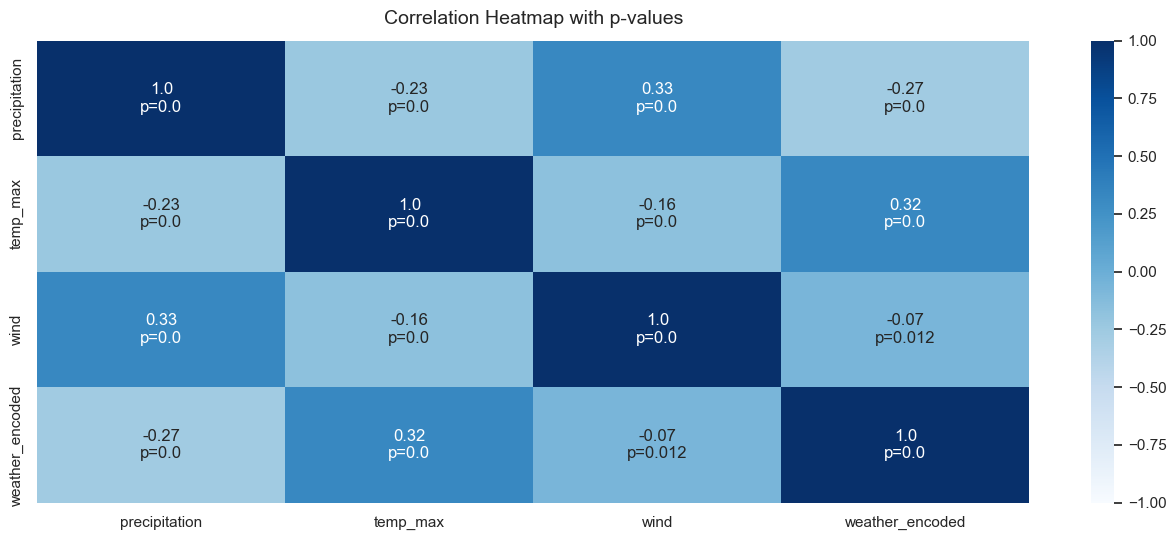

In [512]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=annot, fmt='', vmin=-1, vmax=1, cmap='Blues')
plt.title('Correlation Heatmap with p-values', fontsize=14, pad=12)
plt.show()


## Primary Assumption:

### The Date doesnt matter in predicting weather

In [513]:
df

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


In [514]:
df = df.drop("date",axis=1)
df = df.drop("weather",axis=1)

df.head()

,precipitation,temp_max,temp_min,wind,weather_encoded
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


Removing the Outliers

In [515]:
# calculating the inter quantile range (IQR)

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

outliers = (df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))
df[outliers] = np.nan
df = df.dropna()

In [516]:
df

,precipitation,temp_max,temp_min,wind,weather_encoded
0,0.0,12.8,5.0,4.7,0
2,0.8,11.7,7.2,2.3,2
4,1.3,8.9,2.8,6.1,2
5,2.5,4.4,2.2,2.2,2
6,0.0,7.2,2.8,2.3,2
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,4
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


outliers removed

Time for some transformations lessgoo

In [517]:
    
df['precipitation'] = np.sqrt(df['precipitation'])

df['wind']=np.sqrt(df['wind'])

In [518]:
df

,precipitation,temp_max,temp_min,wind,weather_encoded
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2
...,...,...,...,...,...
1455,0.000000,4.4,0.0,1.581139,4
1457,1.224745,5.0,1.7,1.140175,2
1458,0.000000,7.2,0.6,1.612452,1
1459,0.000000,5.6,-1.0,1.843909,4


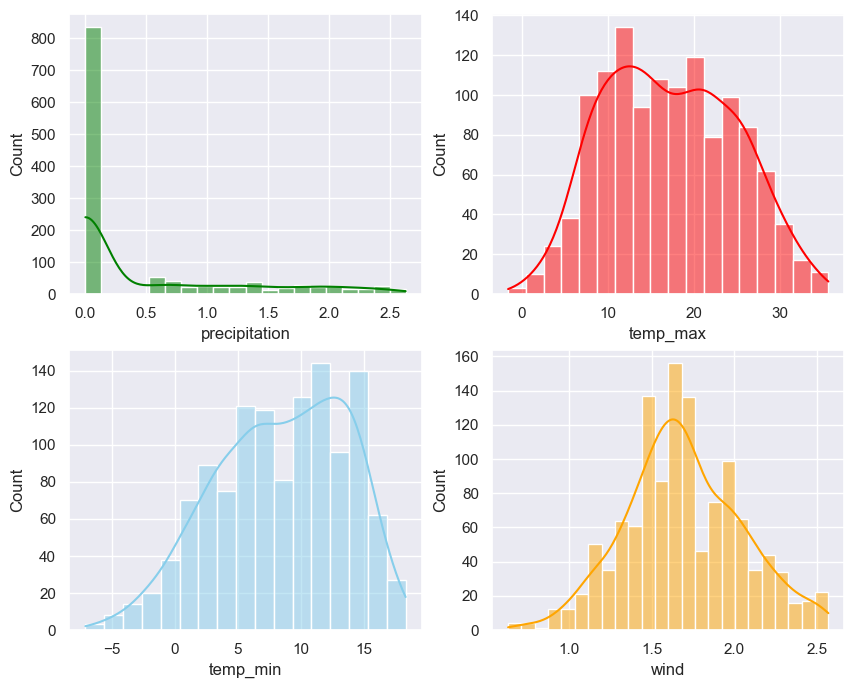

In [519]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, column in enumerate(["precipitation", "temp_max", "temp_min", "wind"]):    
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//2, i%2], color=['green', 'red', 'skyblue', 'orange'][i])

time to split the dataset -> gonna go 0.9:0.1 cuz data too less

In [520]:
from sklearn.model_selection import train_test_split

x = (df.loc[:,df.columns!="weather_encoded"])
y = df["weather_encoded"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2,stratify=y)

In [521]:
x_train

,precipitation,temp_max,temp_min,wind
634,0.00000,17.2,7.2,1.483240
1035,0.00000,11.1,7.2,1.095445
657,0.00000,10.6,7.8,1.183216
277,0.00000,18.9,8.3,2.549510
725,0.00000,6.7,0.6,0.707107
...,...,...,...,...
1298,0.00000,23.9,13.9,1.673320
1408,1.81659,10.0,5.0,1.140175
1187,0.00000,13.3,5.6,1.549193
1391,0.00000,12.8,7.2,1.612452


Time to make model finally XD

In [522]:
from sklearn.metrics import confusion_matrix

## KNN

In [523]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

knn_score=knn.score(x_test,y_test)

print("KNN Accuracy : ",knn_score)

KNN Accuracy :  0.7096774193548387


<Axes: >

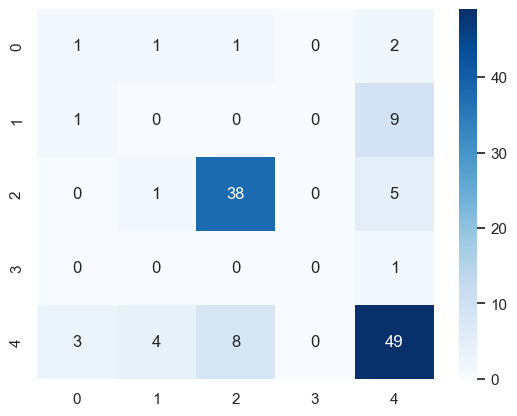

In [524]:
y_pred_knn = knn.predict(x_test)

conf_matrix = confusion_matrix(y_test,y_pred_knn)

sns.heatmap(conf_matrix,annot=True,cmap='Blues')

In [525]:
from sklearn.metrics import classification_report

In [526]:
from sklearn.metrics import roc_curve

In [527]:
import seaborn.objects as so

In [528]:
## Classification Report for KNN

print(classification_report(y_test,y_pred_knn,zero_division=0))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00        10
           2       0.81      0.86      0.84        44
           3       0.00      0.00      0.00         1
           4       0.74      0.77      0.75        64

    accuracy                           0.71       124
   macro avg       0.35      0.37      0.36       124
weighted avg       0.68      0.71      0.69       124



## Decision Trees

In [529]:
from sklearn.tree import DecisionTreeClassifier

max_depth_range = range(1,8)

for depth in max_depth_range:
    dec = DecisionTreeClassifier(max_depth=depth,max_leaf_nodes=5,random_state=0)
    dec.fit(x_train,y_train)
    dec_score = dec.score(x_test,y_test)
    print(f'Decision Tree Accuracy with Depth = {depth}:{dec_score}')

Decision Tree Accuracy with Depth = 1:0.8548387096774194
Decision Tree Accuracy with Depth = 2:0.8467741935483871
Decision Tree Accuracy with Depth = 3:0.8548387096774194
Decision Tree Accuracy with Depth = 4:0.8548387096774194
Decision Tree Accuracy with Depth = 5:0.8548387096774194
Decision Tree Accuracy with Depth = 6:0.8548387096774194
Decision Tree Accuracy with Depth = 7:0.8548387096774194


In [530]:
dec = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=15,random_state=0)
dec.fit(x_train,y_train)
dec_score = dec.score(x_test,y_test)
print(f'Decision Tree Accuracy with Depth = {3}:{dec_score}')

Decision Tree Accuracy with Depth = 3:0.8548387096774194


<Axes: >

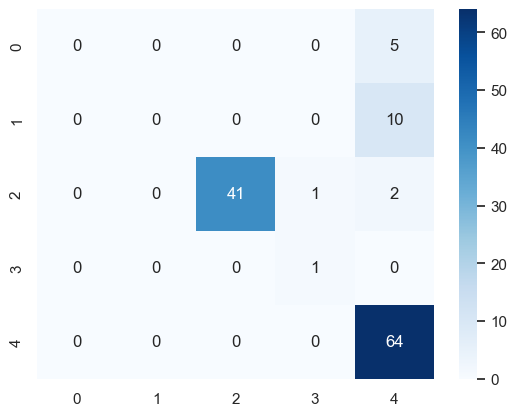

In [531]:
y_pred_dt = dec.predict(x_test)

conf_matrix = confusion_matrix(y_test,y_pred_dt)

sns.heatmap(conf_matrix,annot=True,cmap='Blues')

XGBOOST


In [532]:
import xgboost as xgb

In [602]:
model=xgb.XGBClassifier(use_label_encoder=True,eval_metric='logloss',max_depth=6,n_estimators=100,learning_rate=0.01,reg_aplha=1,reg_lambda=1,gamma=0.5,objective="reg:squarederror")

In [603]:
model.fit(x_train,y_train)

/Users/kkartikaggarwal/.pyenv/versions/3.8.10/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:21:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "reg_aplha", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [604]:
y_predict=model.predict(x_test)

In [605]:
con=confusion_matrix(y_test,y_predict)

<Axes: >

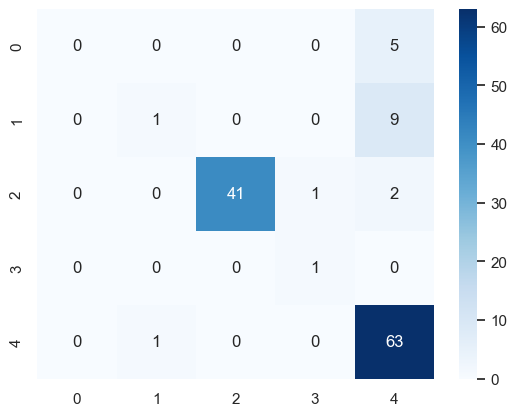

In [606]:
sns.heatmap(con,annot=True,cmap='Blues')

In [607]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

In [608]:
print("Accuracy:", accuracy)

Accuracy: 0.8548387096774194


RANDOM FOREST


In [594]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2],
    'min_child_weight': [1, 3, 5]
}

model = XGBClassifier(objective='reg:squarederror')
random_search = RandomizedSearchCV(model, param_grid, n_iter=30, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}


In [585]:
from sklearn.ensemble import RandomForestClassifier

In [586]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [587]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=1))
])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=1))])

In [591]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
pipeline.fit(x_train, y_train)

# Predict
y_predrf = pipeline.predict(x_test)

In [592]:
accuracyrf = accuracy_score(y_test, y_predrf)

In [593]:
accuracyrf

0.8145161290322581